In [1]:
import numpy as np

In [ ]:
seed = 41

FILENAME = "" # with results

with open(FILENAME,'r') as file:
    s = file.read()

ls = s.split("Participant_ID:")
ls = ls[1:]

def sum_8(x):
    sum = 0
    l = []
    for i in range(8):
        ind = x.find('Score:')
        flt = float(x[ind+7:ind+10])
        sum += int(flt)
        l.append(int(flt))
        x = x[ind+10:]
    return sum,l

In [57]:
csv_path = 'NTU_datasets\dev_split_Depression_AVEC2017.csv'
import pandas as pd
df = pd.read_csv(csv_path)
df.head()

,Participant_ID,PHQ8_Binary,PHQ8_Score,Gender,PHQ8_NoInterest,PHQ8_Depressed,PHQ8_Sleep,PHQ8_Tired,PHQ8_Appetite,PHQ8_Failure,PHQ8_Concentrating,PHQ8_Moving
0,302,0,4,1,1,1,0,1,0,1,0,0
1,307,0,4,0,0,1,0,1,0,2,0,0
2,331,0,8,1,1,1,1,1,1,1,1,1
3,335,1,12,0,1,1,3,2,3,1,1,0
4,346,1,23,0,2,3,3,3,3,3,3,3


In [ ]:
df.drop(df[df["Participant_ID"].isin([451, 458])].index, inplace=True)

def fn(l):
    return [1 if i>=10 else 0 for i in l]

res = []

for i in ls:
    res.append(sum_8(i))

l = [x[0] for x in res]

act = df['PHQ8_Score'].tolist()

for i,j in zip(l,act):
    print(i,j,sep='\t')

from sklearn.metrics import classification_report # type: ignore

report = classification_report(fn(act), fn(l),digits=3) # type: ignore

print(report)

In [ ]:
real = df.iloc[:, -8:].values.tolist()

ind = [x[1] for x in res]

[1, 1, 0, 1, 0, 1, 0, 0]

In [ ]:
phq_scores = [
    'PHQ8_NoInterest',
    'PHQ8_Depressed',
    'PHQ8_Sleep',
    'PHQ8_Tired',
    'PHQ8_Appetite',
    'PHQ8_Failure',
    'PHQ8_Concentrating',
    'PHQ8_Moving'
]

act_bin = df['PHQ8_Binary'].tolist()
act_score = df['PHQ8_Score'].tolist()
rem = 'PHQ8_Tired'
act_dep = df[rem].tolist()
ix = phq_scores.index(rem)

act_score_wo_dep = (np.array(act_score) - np.array(act_dep)).tolist()

ind_wo_dep = [i[:ix]+i[ix+1:] for i in ind]

sum_wo_dep = [sum(i) for i in ind_wo_dep]

def fn2(l):
    return [1 if i>=8.75 else 0 for i in l]

report = classification_report(fn2(act_score_wo_dep), fn2(sum_wo_dep),digits=3) # type: ignore

print(report)

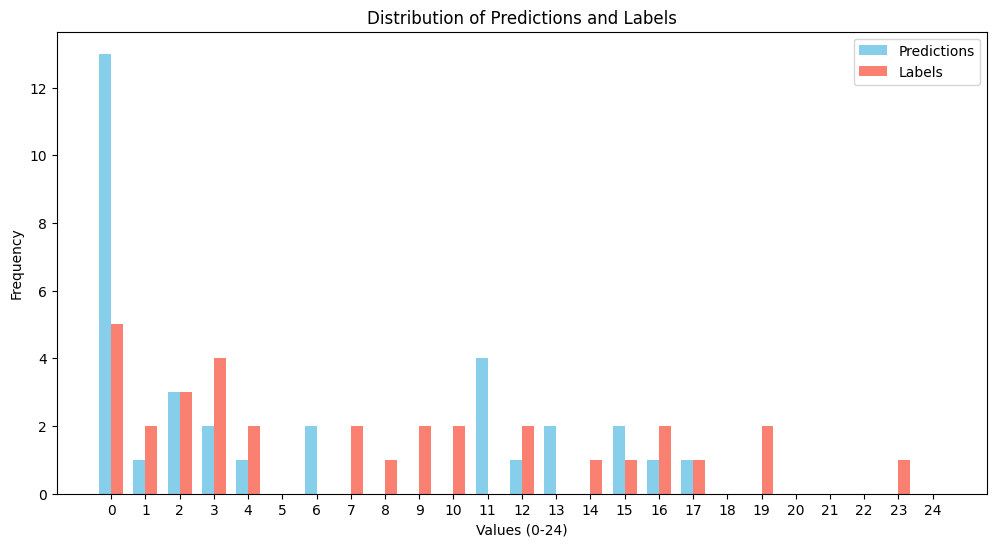

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming l and act are your lists of predictions and labels
l_counts = np.bincount(l, minlength=25)
act_counts = np.bincount(act, minlength=25)

x = np.arange(25)  # Values from 0 to 24

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.35  # Width of the bars

# Plotting the distributions
ax.bar(x - width/2, l_counts, width=width, label='Predictions', color='skyblue')
ax.bar(x + width/2, act_counts, width=width, label='Labels', color='salmon')

# Adding labels and title
ax.set_xlabel('Values (0-24)')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Predictions and Labels')
ax.set_xticks(x)
ax.legend()

plt.show()


In [ ]:
csv_path = 'NTU_datasets\\train_split_Depression_AVEC2017.csv'
import pandas as pd
df_train = pd.read_csv(csv_path)

act_train = df_train['PHQ8_Score'].tolist()

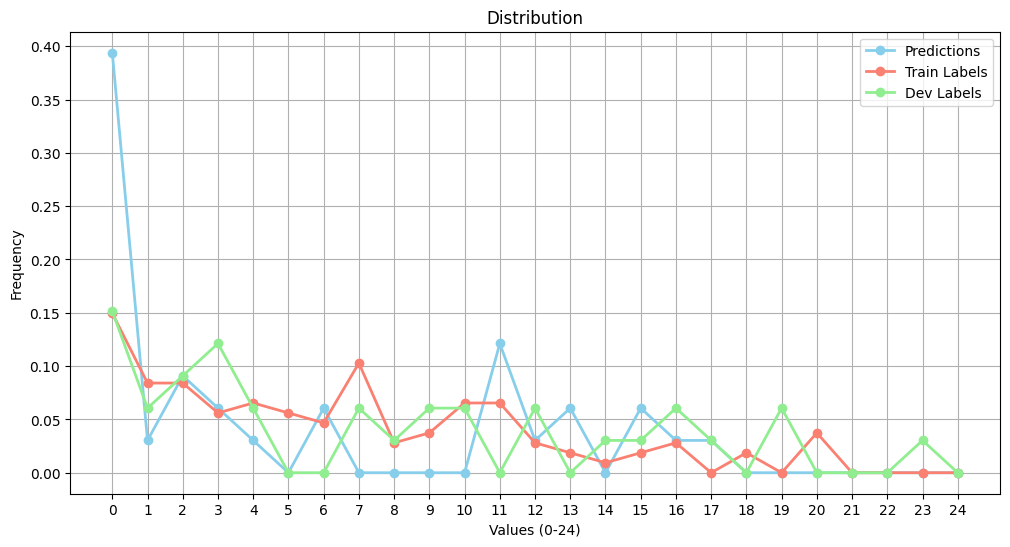

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming l and act are your lists of predictions and labels
l_counts = np.bincount(l, minlength=25) / len(l)
act_counts = np.bincount(act_train, minlength=25) / len(act_train)
act_counts_dev = np.bincount(act, minlength=25) / len(act)

x = np.arange(25)  # Values from 0 to 24

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the distributions as lines
ax.plot(x, l_counts, marker='o', label='Predictions', color='skyblue', linestyle='-', linewidth=2)
ax.plot(x, act_counts, marker='o', label='Train Labels', color='salmon', linestyle='-', linewidth=2)
ax.plot(x, act_counts_dev, marker='o', label='Dev Labels', color='lightgreen', linestyle='-', linewidth=2)

# Adding labels and title
ax.set_xlabel('Values (0-24)')
ax.set_ylabel('Frequency')
ax.set_title('Distribution')
ax.set_xticks(x)
ax.set_xticklabels(x)  # Ensure ticks are labeled correctly
ax.legend()

plt.grid(True)  # Optional: Add grid for better readability
plt.show()


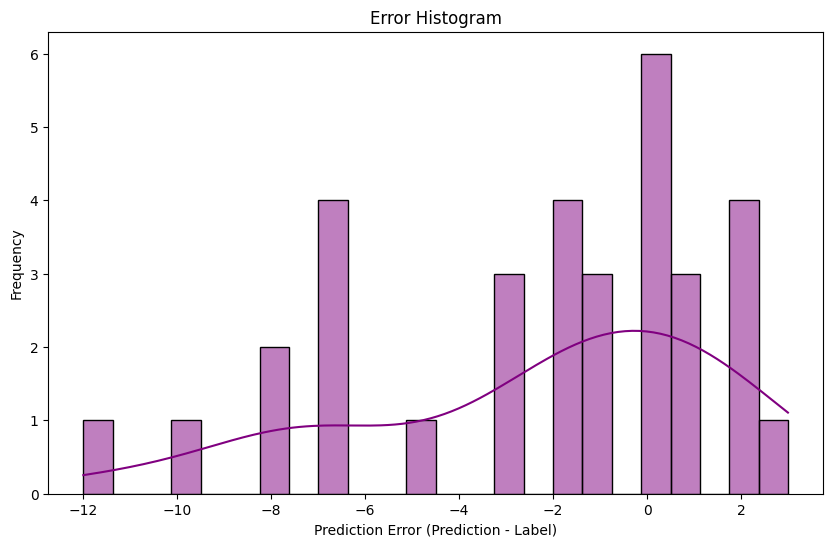

In [33]:
import seaborn as sns

errors = np.array(l) - np.array(act)
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=24, kde=True, color="purple")
plt.xlabel("Prediction Error (Prediction - Label)")
plt.ylabel("Frequency")
plt.title("Error Histogram")
plt.show()


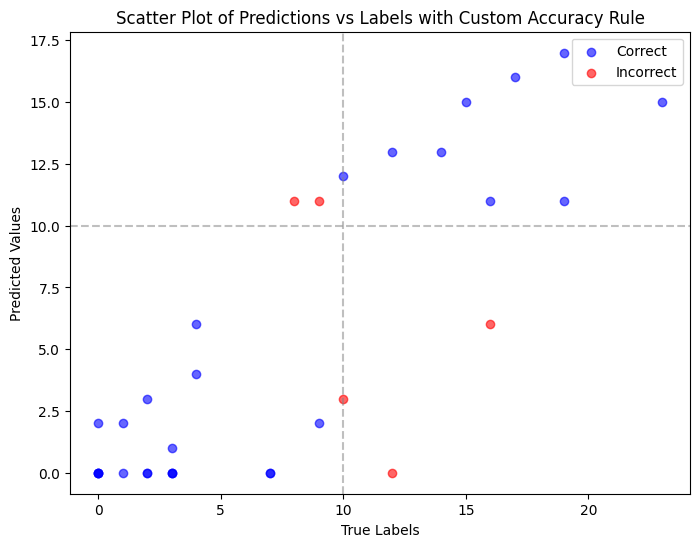

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `predictions` and `labels` are lists of predictions and true values
predictions = np.array(l)
labels = np.array(act)

# Apply the custom rule
correct = ((predictions >= 10) & (labels >= 10)) | ((predictions < 10) & (labels < 10))
incorrect = ~correct

# Count correct and incorrect predictions
custom_cm = np.array([
    [np.sum(correct), np.sum(incorrect)],
    [0, 0]  # This row is unused as there's only two categories, correct/incorrect
])

plt.figure(figsize=(8, 6))
plt.scatter(labels[correct], predictions[correct], color="blue", label="Correct", alpha=0.6)
plt.scatter(labels[incorrect], predictions[incorrect], color="red", label="Incorrect", alpha=0.6)
plt.axhline(10, color="gray", linestyle="--", alpha=0.5)
plt.axvline(10, color="gray", linestyle="--", alpha=0.5)
plt.xlabel("True Labels")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Predictions vs Labels with Custom Accuracy Rule")
plt.legend()
plt.show()


In [ ]:
seed = 40

with open(f'txt_ops/tan_bin_tan_dev_phq_{seed}.txt','r') as file:
    s = file.read()

ls = s.split("Participant_ID: \nResponse: ")
ls = ls[1:]

ls = [i.strip() for i in ls]

act_bin = df['PHQ8_Binary'].tolist()

ls = [1 if i == 'Depressed' else 0 for i in ls]

from sklearn.metrics import classification_report # type: ignore

report = classification_report(act_bin, ls,digits=3) # type: ignore

print(report)

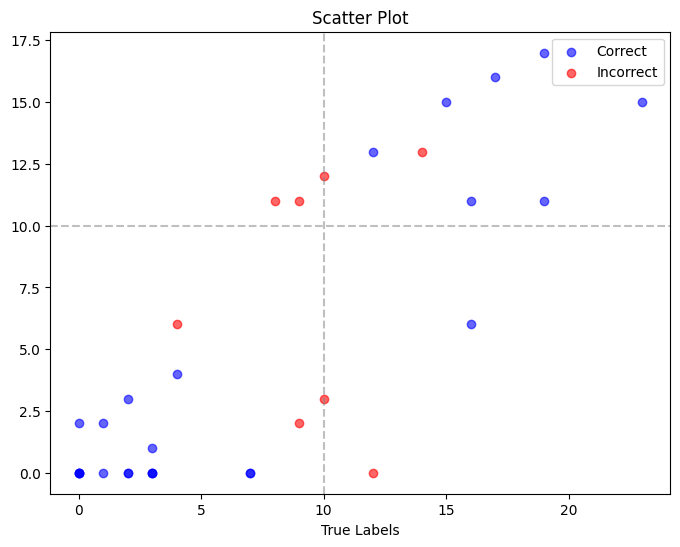

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# # Assuming `predictions` and `labels` are lists of predictions and true values
# predictions = np.array(ls)
# labels = np.array(act_bin)

predictions = np.array(l)
labels = np.array(act)

# Apply the custom rule
correct = np.array(ls) == np.array(act_bin)
incorrect = ~correct

# Count correct and incorrect predictions
custom_cm = np.array([
    [np.sum(correct), np.sum(incorrect)],
    [0, 0]  # This row is unused as there's only two categories, correct/incorrect
])

plt.figure(figsize=(8, 6))
plt.scatter(labels[correct], predictions[correct], color="blue", label="Correct", alpha=0.6)
plt.scatter(labels[incorrect], predictions[incorrect], color="red", label="Incorrect", alpha=0.6)
plt.axhline(10, color="gray", linestyle="--", alpha=0.5)
plt.axvline(10, color="gray", linestyle="--", alpha=0.5)
plt.xlabel("True Labels")
# plt.ylabel("Predicted Values")
plt.title("Scatter Plot")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

question_labels = phq_scores * len(ind)

# Flatten predictions and actuals
flat_predictions = [pred for sublist in ind for pred in sublist]
flat_actuals = [actual for sublist in real for actual in sublist]

# Create DataFrame for easier aggregation
data = pd.DataFrame({
    'Question': question_labels,
    'Actual': flat_actuals,
    'Prediction': flat_predictions
})

# Confusion Matrix and Classification Report per Question
for question in phq_scores:
    question_data = data[data['Question'] == question]
    actual = question_data['Actual']
    pred = question_data['Prediction']
    # Classification Report
    print(f"\nClassification Report for {question}:")
    print(classification_report(actual, pred, zero_division=1))



Classification Report for PHQ8_NoInterest:
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        17
           1       1.00      0.00      0.00        10
           2       0.36      1.00      0.53         5
           3       1.00      0.00      0.00         1

    accuracy                           0.58        33
   macro avg       0.77      0.46      0.33        33
weighted avg       0.77      0.58      0.48        33


Classification Report for PHQ8_Depressed:
              precision    recall  f1-score   support

           0       0.58      1.00      0.73        11
           1       0.60      0.21      0.32        14
           2       0.12      0.20      0.15         5
           3       0.00      0.00      0.00         3

    accuracy                           0.45        33
   macro avg       0.33      0.35      0.30        33
weighted avg       0.47      0.45      0.40        33


Classification Report for PHQ8_Sleep:
    

Mean Absolute Error (MAE) and Mean Squared Error (MSE) for each question:
             Question       MAE       MSE
0     PHQ8_NoInterest  0.515152  0.696970
1      PHQ8_Depressed  0.575758  0.636364
2          PHQ8_Sleep  0.696970  1.363636
3          PHQ8_Tired  0.757576  1.181818
4       PHQ8_Appetite  0.666667  1.030303
5        PHQ8_Failure  0.424242  0.606061
6  PHQ8_Concentrating  0.515152  0.696970
7         PHQ8_Moving  0.363636  0.666667


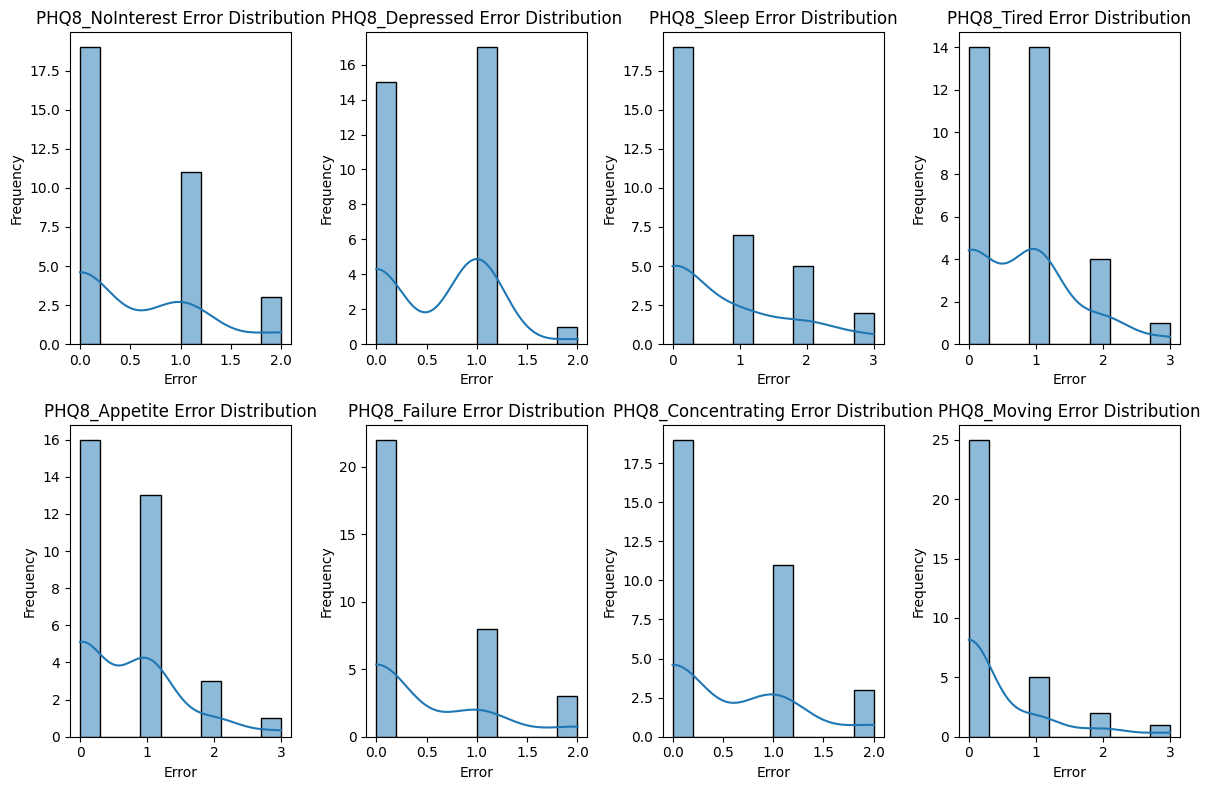

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Question labels for reference
phq_scores = [
    'PHQ8_NoInterest', 'PHQ8_Depressed', 'PHQ8_Sleep', 'PHQ8_Tired',
    'PHQ8_Appetite', 'PHQ8_Failure', 'PHQ8_Concentrating', 'PHQ8_Moving'
]

predictions = ind
actuals = real

# Flatten predictions and actuals
flat_predictions = np.array([pred for sublist in predictions for pred in sublist])
flat_actuals = np.array([actual for sublist in actuals for actual in sublist])

# Calculate errors
errors = flat_predictions - flat_actuals
abs_errors = np.abs(errors)

# Organize data by question
errors_by_question = abs_errors.reshape(len(predictions), len(phq_scores)).T
mse_by_question = [mean_squared_error([pred[i] for pred in predictions], [act[i] for act in actuals]) for i in range(len(phq_scores))]
mae_by_question = [mean_absolute_error([pred[i] for pred in predictions], [act[i] for act in actuals]) for i in range(len(phq_scores))]

# Display MAE and MSE by question
mae_mse_df = pd.DataFrame({'Question': phq_scores, 'MAE': mae_by_question, 'MSE': mse_by_question})
print("Mean Absolute Error (MAE) and Mean Squared Error (MSE) for each question:")
print(mae_mse_df)

# Plotting error distributions by question
plt.figure(figsize=(12, 8))
for i, question in enumerate(phq_scores):
    plt.subplot(2, 4, i + 1)
    sns.histplot(errors_by_question[i], kde=True, bins=10)
    plt.title(f'{question} Error Distribution')
    plt.xlabel('Error')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


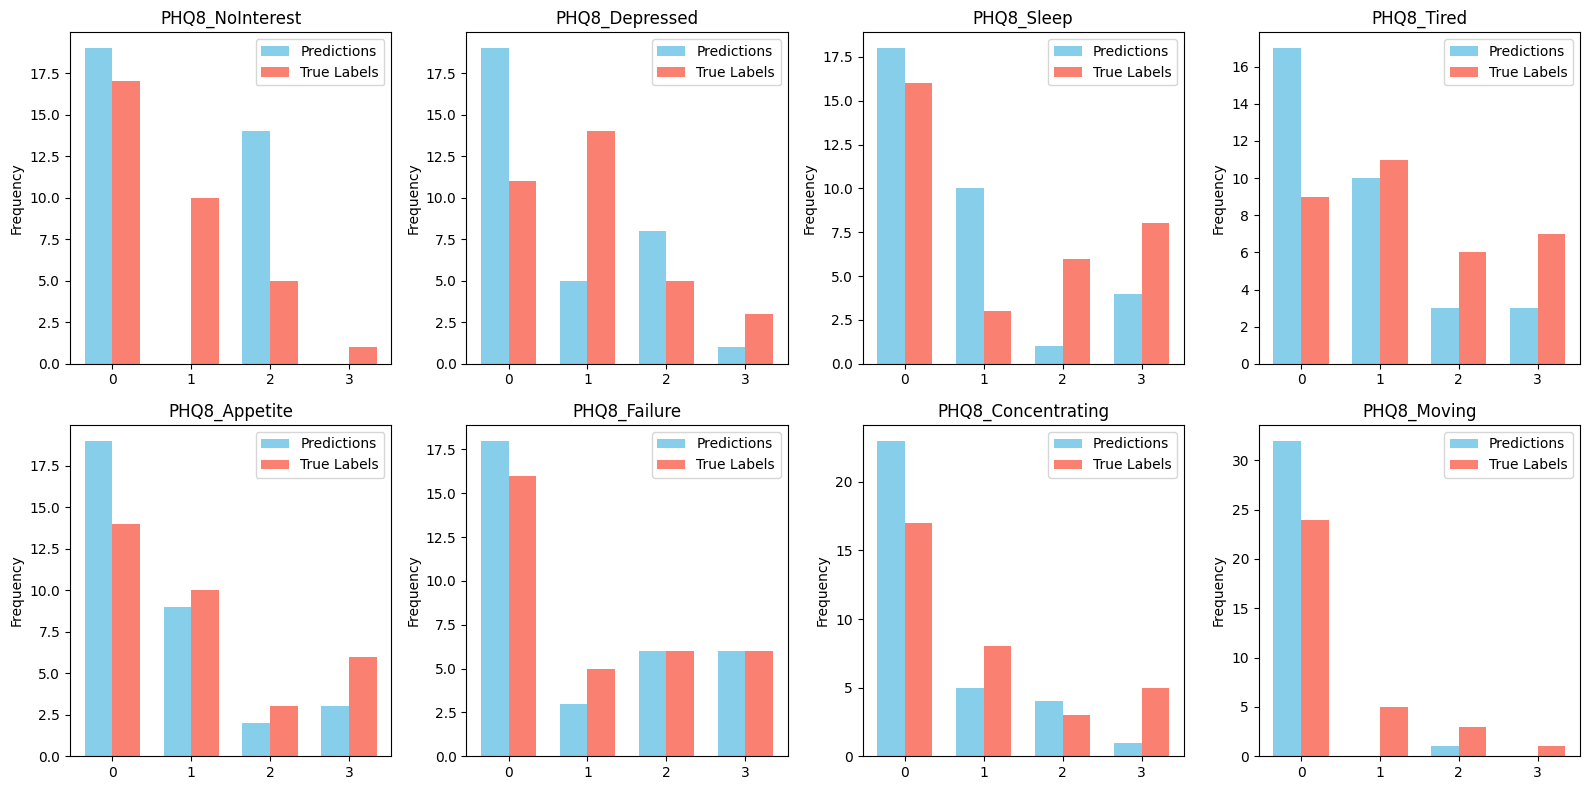

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Example data: replace with your actual predictions and true scores
phq_scores = [
    'PHQ8_NoInterest',
    'PHQ8_Depressed',
    'PHQ8_Sleep',
    'PHQ8_Tired',
    'PHQ8_Appetite',
    'PHQ8_Failure',
    'PHQ8_Concentrating',
    'PHQ8_Moving'
]

predicted_scores = np.array(ind)
true_scores = np.array(real)

# Set up the plot
num_questions = len(phq_scores)
x = np.arange(4)  # Score range from 0 to 3
width = 0.35  # Width of the bars

# Create subplots in a 2x4 grid layout
fig, axes = plt.subplots(2, 4, figsize=(16, 8))  # Adjust figure size as needed

for i, score in enumerate(phq_scores):
    ax = axes[i // 4, i % 4]  # Determine the appropriate subplot position
    # Count occurrences of predicted and true scores
    pred_counts = np.bincount(predicted_scores[:, i], minlength=4)
    true_counts = np.bincount(true_scores[:, i], minlength=4)

    # Plotting the distributions
    ax.bar(x - width / 2, pred_counts, width=width, label='Predictions', color='skyblue')
    ax.bar(x + width / 2, true_counts, width=width, label='True Labels', color='salmon')

    # Adding labels and title
    ax.set_ylabel('Frequency')
    ax.set_title(f'{score}')
    ax.set_xticks(x)
    ax.set_xticklabels(x)
    ax.legend()

# Set common x-label
# plt.xlabel('Scores (0-3)')
plt.tight_layout()
plt.show()


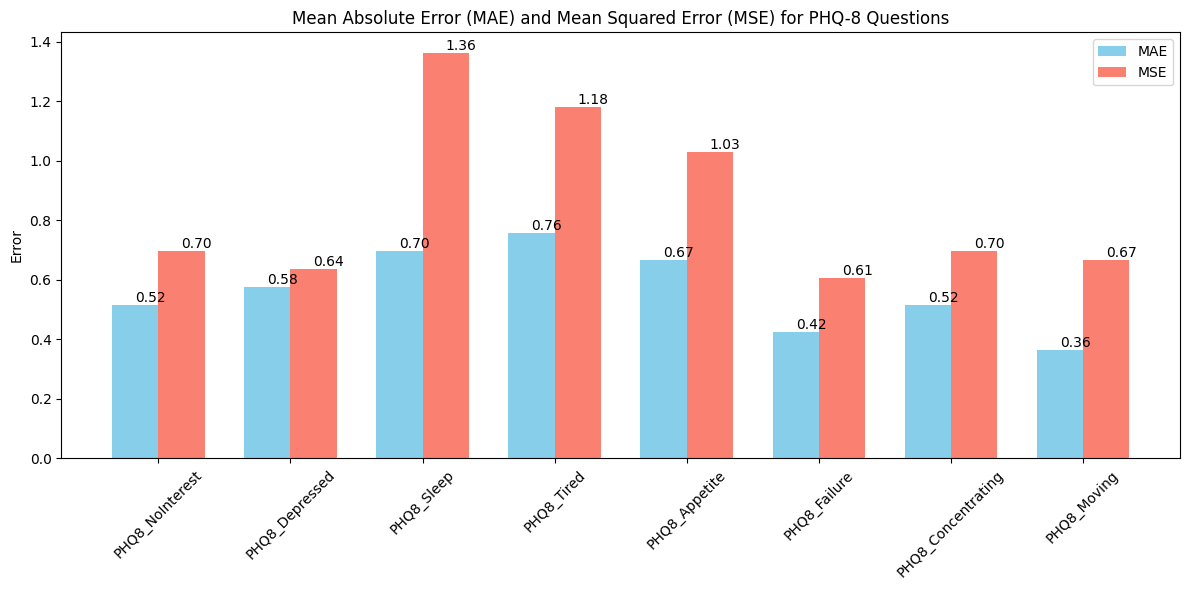

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

predicted_scores = np.array(ind)
true_scores = np.array(real)

# Calculate MAE and MSE for each question
mae = np.mean(np.abs(predicted_scores - true_scores), axis=0)
mse = np.mean((predicted_scores - true_scores) ** 2, axis=0)

# Create a DataFrame for better visualization
metrics_df = pd.DataFrame({
    'Question': phq_scores,
    'MAE': mae,
    'MSE': mse
})

# Display the metrics DataFrame
# print(metrics_df)

# Set up the plot for MAE and MSE
x = np.arange(len(phq_scores))  # x locations for the groups
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting MAE and MSE
bars1 = ax.bar(x - width/2, metrics_df['MAE'], width, label='MAE', color='skyblue')
bars2 = ax.bar(x + width/2, metrics_df['MSE'], width, label='MSE', color='salmon')

# Adding labels and title
ax.set_ylabel('Error')
ax.set_title('Mean Absolute Error (MAE) and Mean Squared Error (MSE) for PHQ-8 Questions')
ax.set_xticks(x)
ax.set_xticklabels(metrics_df['Question'], rotation=45)
ax.legend()

# Add value labels on top of the bars
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom')  # va: vertical alignment
for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom')

plt.tight_layout()
plt.show()


In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

predicted_scores = np.array(ind)
true_scores = np.array(real)

# Calculate metrics
mae = np.mean(np.abs(predicted_scores - true_scores), axis=0)
mse = np.mean((predicted_scores - true_scores) ** 2, axis=0)
rmse = np.sqrt(mse)
bias = np.mean(predicted_scores - true_scores, axis=0)
r_squared = 1 - (np.sum((predicted_scores - true_scores) ** 2, axis=0) / np.sum((true_scores - np.mean(true_scores, axis=0)) ** 2, axis=0))

# Create a DataFrame for metrics
metrics_df = pd.DataFrame({
    'Question': phq_scores,
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'Bias': bias,
    'R²': r_squared
})

# Display the metrics DataFrame
print(metrics_df)


             Question       MAE       MSE      RMSE      Bias        R²
0     PHQ8_NoInterest  0.515152  0.696970  0.834847  0.151515 -0.001319
1      PHQ8_Depressed  0.575758  0.636364  0.797724 -0.272727  0.250000
2          PHQ8_Sleep  0.696970  1.363636  1.167748 -0.454545  0.149485
3          PHQ8_Tired  0.757576  1.181818  1.087115 -0.575758  0.008475
4       PHQ8_Appetite  0.666667  1.030303  1.015038 -0.363636  0.170118
5        PHQ8_Failure  0.424242  0.606061  0.778499 -0.060606  0.564069
6  PHQ8_Concentrating  0.515152  0.696970  0.834847 -0.393939  0.417945
7         PHQ8_Moving  0.363636  0.666667  0.816497 -0.363636 -0.096677
